In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
from datetime import datetime

In [35]:
omega = 7.292e-5
phi = 43.5
# f = 2*omega*np.sin(np.deg2rad(phi))
f = 1e-4
f_per = ((2*np.pi)/f)
print(f)
print(f_per/3600)
print(0.9*(f_per/3600))
print(0.93*(f_per/3600)/24)

0.0001
17.453292519943293
15.707963267948964
0.6763150851478027


# To get near resonance, we need ~90-95\% of the prescribed inertial period. So winds should not be diurnal for this latitude, but oscillate up and down once every ~16 hours

In [21]:
from datetime import datetime
def make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path):
  
    t = xr.DataArray(np.arange(0, ndays+dtw, dtw)[:-1], dims=['sms_time'])
    #t*2.0*pi for diurnal, 4pi for semidiurnal. This is for downwelling winds only. 
    uwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*0.5*u_amp+(0.5*u_amp)), dims=['sms_time'])
    vwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*0.5*v_amp+(0.5*v_amp)), dims=['sms_time'])


    # Create dataset
    ds = xr.Dataset({'sms_time': t, 'sustr': uwind_strs, 'svstr': vwind_strs})

    ds.attrs['Description'] = 'Forcing for ideal shelf'
    ds.attrs['Author'] = 'Dylan Schlichting'
    ds.attrs['Created'] = datetime.now().isoformat()
    ds.attrs['type'] = 'ROMS FRC file'
    ds['sms_time'].attrs['units'] = 'days'
    ds['sustr'].attrs['units'] = 'Newton meter-2'
    ds['svstr'].attrs['units'] = 'Newton meter-2'

    print('Writing netcdf FRC file: '+output_path)
    # Save dataset to a netcdf file  
    # ds.to_netcdf(output_path)
    return ds


Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_0_frc.nc


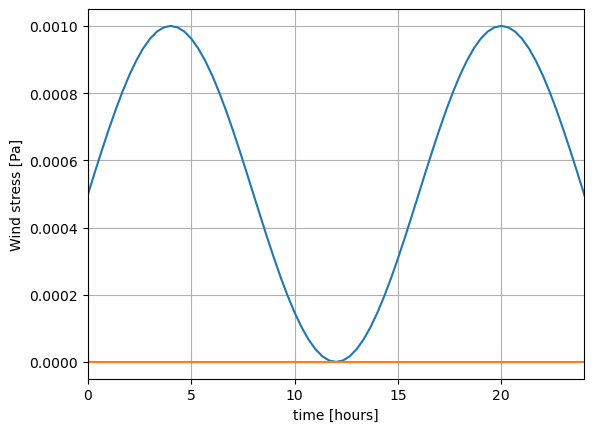

In [61]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_0_frc.nc'
ndays = 60
dtw = 1/72 
wind_freq = 3
u_amp = 0.001 
v_amp = 0 
ds = make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
# dsf = xr.open_dataset(output_path)
# time = (ds.sms_time.values.astype(float))/10**9/86400
plt.plot(ds.sms_time[:140]*24,ds.sustr[:140])
plt.plot(ds.sms_time[:140]*24,ds.svstr[:140])
plt.xlabel('time [hours]')
plt.ylabel('Wind stress [Pa]')
# plt.xlim(0,0.7)
plt.xlim(0,24)
plt.grid(which = 'both')

In [68]:
#Calculate period of the sine wave. y = Asin(bx), period = (2*pi)/b, b comes from above. 
B = wind_freq*np.pi
period = 2*np.pi/B
period_days = period*24 # Calculate wave frequency in days
per_resonance = period_days/(f_per/3600) #Calculate % resonance with f.
print('Wind period / inertial period:', per_resonance*100)

Wind period / inertial period: 91.67324722093173


In [69]:
def make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path):
  
    t = xr.DataArray(np.arange(0, ndays+dtw, dtw)[:-1], dims=['sms_time'])
    #t*2.0*pi for diurnal, 4pi for semidiurnal. This is for downwelling winds only. 
    uwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*0.5*u_amp+(0.5*u_amp)), dims=['sms_time'])
    vwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*0.5*v_amp+(0.5*v_amp)), dims=['sms_time'])


    # Create dataset
    ds = xr.Dataset({'sms_time': t, 'sustr': uwind_strs, 'svstr': vwind_strs})

    ds.attrs['Description'] = 'Forcing for ideal shelf'
    ds.attrs['Author'] = 'Dylan Schlichting'
    ds.attrs['Created'] = datetime.now().isoformat()
    ds.attrs['type'] = 'ROMS FRC file'
    ds['sms_time'].attrs['units'] = 'days'
    ds['sustr'].attrs['units'] = 'Newton meter-2'
    ds['svstr'].attrs['units'] = 'Newton meter-2'

    print('Writing netcdf FRC file: '+output_path)
    # Save dataset to a netcdf file  
    ds.to_netcdf(output_path)
    return ds

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_001_f_43N_frc.nc


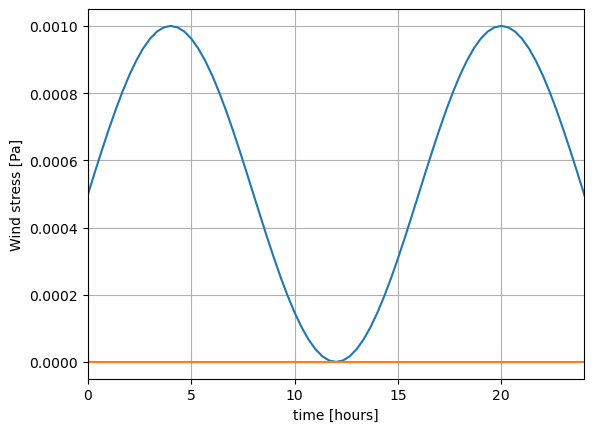

In [70]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_001_f_43N_frc.nc'
ndays = 60
dtw = 1/72 
wind_freq = 3
u_amp = 0.001 
v_amp = 0 
ds = make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (ds.sms_time.values.astype(float))/10**9/3600
plt.plot(ds.sms_time[:140]*24,ds.sustr[:140])
plt.plot(ds.sms_time[:140]*24,ds.svstr[:140])
plt.xlabel('time [hours]')
plt.ylabel('Wind stress [Pa]')
# plt.xlim(0,0.7)
plt.xlim(0,24)
plt.grid(which = 'both')

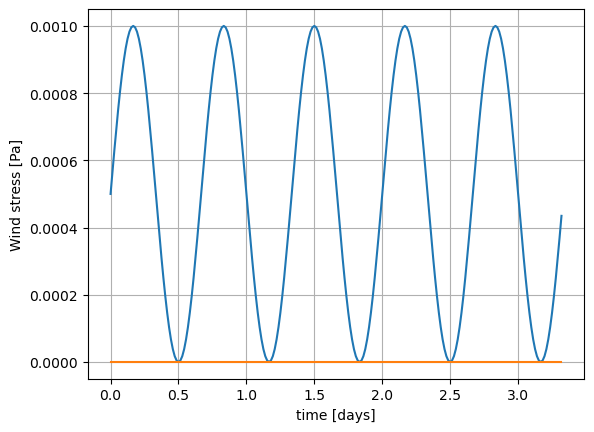

In [75]:
dsf = xr.open_dataset(output_path)
time = (ds.sms_time.values.astype(float))/10**9/3600
plt.plot(ds.sms_time[:240],ds.sustr[:240])
plt.plot(ds.sms_time[:240],ds.svstr[:240])
plt.xlabel('time [days]')
plt.ylabel('Wind stress [Pa]')
# plt.xlim(0,0.7)
# plt.xlim(0,24)
plt.grid(which = 'both')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_005_f_43N_frc.nc


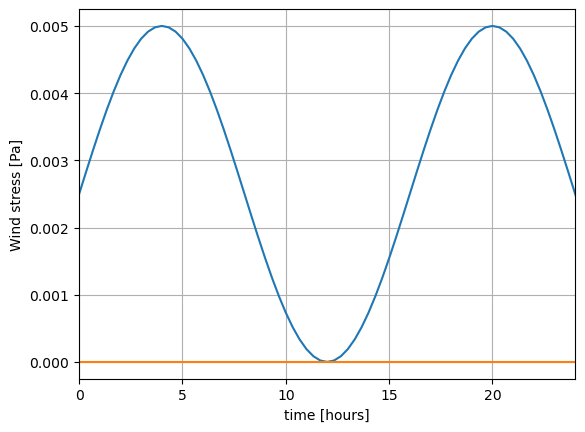

In [77]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_005_f_43N_frc.nc'
ndays = 60
dtw = 1/72 
wind_freq = 3
u_amp = 0.005 
v_amp = 0 
ds = make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (ds.sms_time.values.astype(float))/10**9/3600
plt.plot(ds.sms_time[:140]*24,ds.sustr[:140])
plt.plot(ds.sms_time[:140]*24,ds.svstr[:140])
plt.xlabel('time [hours]')
plt.ylabel('Wind stress [Pa]')
# plt.xlim(0,0.7)
plt.xlim(0,24)
plt.grid(which = 'both')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_01_f_43N_frc.nc


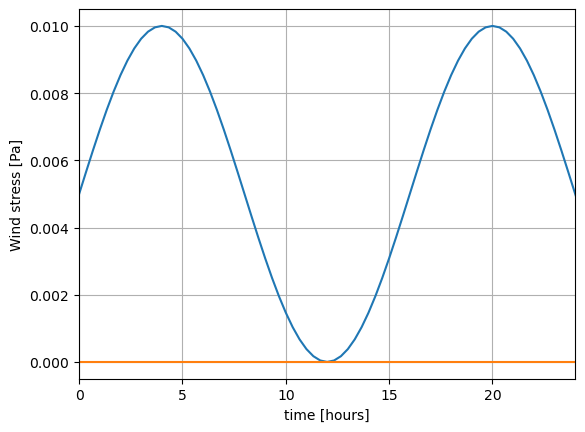

In [78]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_01_f_43N_frc.nc'
ndays = 60
dtw = 1/72 
wind_freq = 3
u_amp = 0.01 
v_amp = 0 
ds = make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (ds.sms_time.values.astype(float))/10**9/3600
plt.plot(ds.sms_time[:140]*24,ds.sustr[:140])
plt.plot(ds.sms_time[:140]*24,ds.svstr[:140])
plt.xlabel('time [hours]')
plt.ylabel('Wind stress [Pa]')
# plt.xlim(0,0.7)
plt.xlim(0,24)
plt.grid(which = 'both')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_02_f_43N_frc.nc


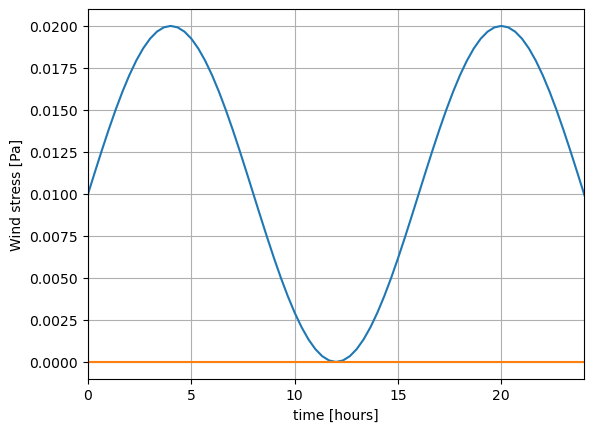

In [79]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_02_f_43N_frc.nc'
ndays = 60
dtw = 1/72 
wind_freq = 3
u_amp = 0.02 
v_amp = 0 
ds = make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (ds.sms_time.values.astype(float))/10**9/3600
plt.plot(ds.sms_time[:140]*24,ds.sustr[:140])
plt.plot(ds.sms_time[:140]*24,ds.svstr[:140])
plt.xlabel('time [hours]')
plt.ylabel('Wind stress [Pa]')
# plt.xlim(0,0.7)
plt.xlim(0,24)
plt.grid(which = 'both')

In [ ]:
# Next, we could write some code to